## Bangalore AvgTemp Prediction

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('Cleaned data/Bangalore_edited.csv')

In [4]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

features = ['MaxTemp', 'MinTemp', 'Precipitation'] 
target = 'AvgTemp'

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)


Mean Absolute Error: 0.595721751647458
Mean Squared Error: 0.6130024705377436


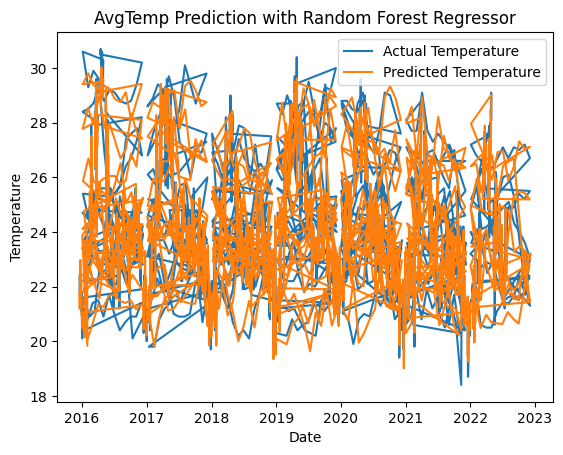

In [5]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

plt.plot(test['Date'], y_test, label='Actual Temperature')
plt.plot(test['Date'], predictions, label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title(f'{target} Prediction with Random Forest Regressor')
plt.legend()
plt.show()